In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [ ]:
train_label[0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)

In [ ]:
train_image.shape, test_image.shape

In [ ]:
train_image = train_image.reshape((60000, 28, 28, 1))
train_image = train_image.astype('float32') / 255

In [ ]:
test_image = test_image.reshape((10000, 28, 28, 1))
test_image = test_image.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
test_label = to_categorical(test_label)
train_label = to_categorical(train_label)

In [ ]:
train_label[0]

In [ ]:
from tensorflow.keras import layers, models, regularizers

In [35]:
cnn = models.Sequential([
  # feature extraction layer
  layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  layers.MaxPool2D(pool_size=2),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  layers.MaxPool2D(pool_size=2),
  layers.Flatten(),
  # classifer layer
  layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.4),
  layers.Dense(10, activation='softmax')
])

In [36]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [37]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = cnn.fit(train_image, train_label, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3195 - accuracy: 0.9473 - val_loss: 0.1045 - val_accuracy: 0.9837
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1060 - accuracy: 0.9808 - val_loss: 0.1064 - val_accuracy: 0.9798
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0837 - accuracy: 0.9836 - val_loss: 0.0772 - val_accuracy: 0.9864
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0728 - accuracy: 0.9861 - val_loss: 0.0686 - val_accuracy: 0.9872
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0643 - accuracy: 0.9878 - val_loss: 0.0654 - val_accuracy: 0.9862
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0602 - accuracy: 0.9885 - val_loss: 0.0664 - val_accuracy: 0.9869
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0573 - accuracy: 0.9886 - val_loss: 0.0567 - val_accuracy: 0.9897
Epoch 

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

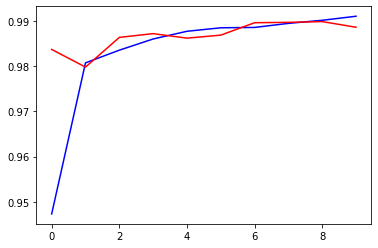

In [40]:
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')


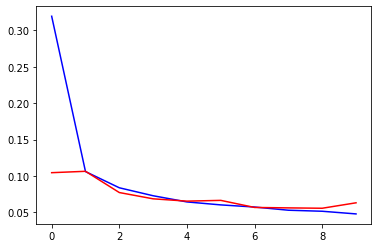

In [41]:
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')

In [42]:
cnn.evaluate(test_image, test_label)

313/313 [==============================] - 1s 4ms/step - loss: 0.0531 - accuracy: 0.9900


[0.05314939096570015, 0.9900000095367432]